In [1]:
from google.colab import drive
drive.mount("/content/drive")

file_path = ("/content/drive/MyDrive/listing_data_publish.csv")

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


In [3]:
df = pd.read_csv(file_path)

# dropping irrelevent cloumns

df_features = df[['building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'price']]

df_features

,building_age,total_floor_count,floor_no,room_count,size,price
0,3,4,Kot 3,3+1,130.0,NaN
1,0,5,1,4+1,175.0,209500.0
2,0,3,1,3+1,125.0,210000.0
3,0,10,7,2+1,72.0,285000.0
4,0,4,3,1+1,75.0,139000.0
...,...,...,...,...,...,...
225732,0,6,5,2+1,120.0,210000.0
225733,0,5,Yüksek Giriş,3+1,120.0,218000.0
225734,0,4,Giriş Katı,1+1,60.0,100000.0
225735,0,6,5,6+2,250.0,360000.0


In [4]:
# encoding string values in integer value columns
label_encoder = LabelEncoder()
df_features['floor_no'] = label_encoder.fit_transform(df_features['floor_no'])
df_features['room_count'] = label_encoder.fit_transform(df_features['room_count'])
df_features['building_age'] = label_encoder.fit_transform(df_features['building_age'])
df_features['total_floor_count'] = label_encoder.fit_transform(df_features['total_floor_count'])

df_features

<ipython-input-4-9ecb0b047953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['floor_no'] = label_encoder.fit_transform(df_features['floor_no'])
<ipython-input-4-9ecb0b047953>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['room_count'] = label_encoder.fit_transform(df_features['room_count'])
<ipython-input-4-9ecb0b047953>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,building_age,total_floor_count,floor_no,room_count,size,price
0,7,6,28,5,130.0,NaN
1,0,7,0,7,175.0,209500.0
2,0,5,0,5,125.0,210000.0
3,0,1,17,3,72.0,285000.0
4,0,6,13,1,75.0,139000.0
...,...,...,...,...,...,...
225732,0,8,15,3,120.0,210000.0
225733,0,7,32,5,120.0,218000.0
225734,0,6,24,1,60.0,100000.0
225735,0,8,15,14,250.0,360000.0


In [5]:
# removing NaN values
df_features.dropna()

# funtion for outliers
def handle_outliers(feature):
  data_sorted = df_features.sort_values(by = feature)
  Q1 = data_sorted[feature].quantile(0.25)
  Q3 = data_sorted[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = df_features[(df_features[feature] >= lower_bound) & (df_features[feature] <= upper_bound)]
  return data_filtered


# Handling outliers
for i in df_features:
  df_features = handle_outliers(i)


# Data Normalization
standard_scaler = StandardScaler()
standardized_features = standard_scaler.fit_transform(df_features)
df_features = pd.DataFrame(standardized_features, columns = df_features.columns)\

df_features

,building_age,total_floor_count,floor_no,room_count,size,price
0,-0.753015,0.567242,-1.552299,2.054503,1.643599,-0.272363
1,-0.753015,-0.520630,-1.552299,0.728704,0.246266,-0.267485
2,-0.753015,0.023306,-0.168310,-1.922893,-1.151068,-0.960186
3,-0.753015,-0.520630,-0.381231,-0.597094,-0.508295,-0.706521
4,-0.753015,0.023306,1.215679,-0.597094,-0.592135,-1.000187
...,...,...,...,...,...,...
189693,1.395939,0.023306,-0.381231,0.728704,0.106532,0.708150
189694,-0.753015,1.111177,0.044611,-0.597094,0.106532,-0.267485
189695,-0.753015,0.567242,1.854443,0.728704,0.106532,-0.189434
189696,-0.753015,0.023306,1.002757,-1.922893,-1.570268,-1.340684


In [6]:
X = df_features.drop('price', axis=1)
y = df_features['price']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build a deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

1186/1186 [==============================] - 2s 1ms/step
Mean Squared Error: 0.7389842412240475


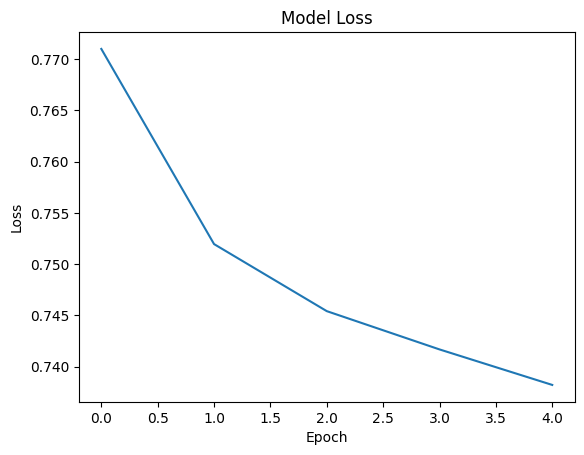

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
